# Objective

**Combine historical usage patterns with weather data in order to forecast bike rental demand 
in the Capital Bikeshare program in Washington, D.C

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city

In [1]:
# https://www.kaggle.com/c/bike-sharing-demand/overview

# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change working directory
%pwd
%cd C:\Users\aditi\OneDrive\Desktop\laptop_backup\study\kaggle\bike_rental
%pwd

C:\Users\aditi\OneDrive\Desktop\laptop_backup\study\kaggle\bike_rental


'C:\\Users\\aditi\\OneDrive\\Desktop\\laptop_backup\\study\\kaggle\\bike_rental'

In [3]:
# Read the input data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

## Exploratory Data Analysis

In [4]:
# Run below snippet to allow multiple outputs in one cell of python notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
train_data.head()
train_data.info()
train_data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
test_data.head()
test_data.info()
test_data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


On the basis of above information about datasets split the columns as numerical and categorical for further analysis

In [7]:
numeric_columns=['temp','atemp','humidity','windspeed','casual','registered','count']
cat_columns=['season','holiday','workingday','weather']

In [8]:
# Only obtain summary stats for numeric columns
train_data[numeric_columns].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Only obtain number of unique values for categorical columns
train_data[cat_columns].nunique()

season        4
holiday       2
workingday    2
weather       4
dtype: int64

In [10]:
# value_counts() is only available for pandas series and not dataframe 
# so train_data[cat_columns].value_counts() throws error
type(train_data['season'])
train_data['season'].value_counts()

pandas.core.series.Series

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [11]:
# Obtain value counts for each categorical columns
for i in cat_columns:
    print(i,'----->')
    print(train_data[i].value_counts())
    print('*'*50)

season ----->
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
**************************************************
holiday ----->
0    10575
1      311
Name: holiday, dtype: int64
**************************************************
workingday ----->
1    7412
0    3474
Name: workingday, dtype: int64
**************************************************
weather ----->
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
**************************************************


### Missing Value analysis

In [12]:
# Check for missing values in data

train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

We are lucky to have no missing values in our dataset

### Outlier analysis

For outlier analysis we are going to look at the boxplots and distribution plots for the temperature, humidity & windspeed variable

In [13]:
# Let's call help on suplot to check the parameters

# help (plt.subplot)
    

In [14]:
# help(sns.boxplot)

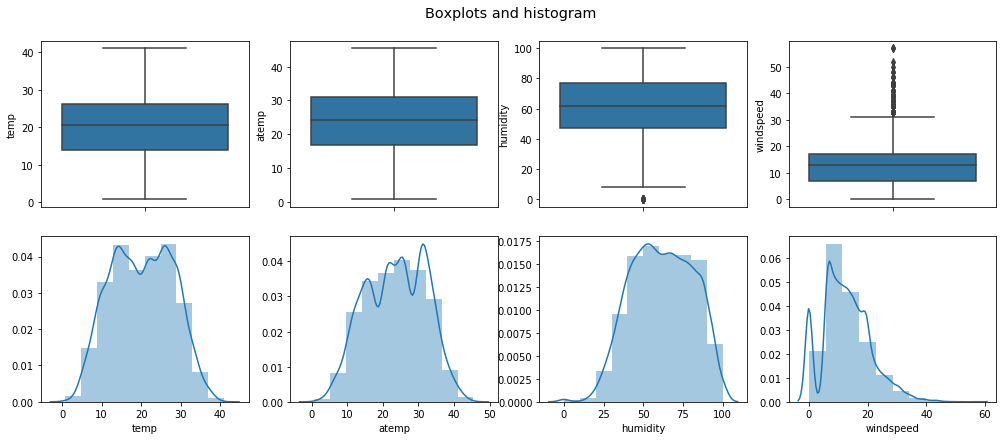

In [15]:
def boxplot_and_hist(col1,col2,col3,col4,input_data, bin1=10,bin2=20,bin3=30,bin4=30):
    fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(14,6))
    super_title=fig.suptitle('Boxplots and histogram', fontsize='x-large')
    plt.tight_layout()
    sns.boxplot(y = col1, data = input_data, ax = ax[0][0])
    sns.boxplot(y = col2, data = input_data, ax = ax[0][1])
    sns.boxplot(y = col3, data = input_data, ax = ax[0][2])
    sns.boxplot(y = col4, data = input_data, ax = ax[0][3])
    sns.distplot( input_data[col1], ax=ax[1][0],bins = bin1)
    sns.distplot( input_data[col2], ax=ax[1][1],bins = bin1)
    sns.distplot( input_data[col3], ax=ax[1][2],bins = bin1)
    sns.distplot( input_data[col4], ax=ax[1][3],bins = bin1)
    fig.subplots_adjust(top=0.9)
    plt.show()

    
boxplot_and_hist('temp','atemp','humidity','windspeed',train_data)

There seem to be some outliers for humidity and windspeed and none for temp and a temp.
Given it's a weather data where outliers for windspeed are possible so let's make a model without removing outliers and see if it performs well. 

### Feature Engineering

In [16]:
type(train_data['datetime'][0])
train_data['datetime'][0]

# Ignore - Test snippet
from datetime import datetime
p=train_data['datetime'][0]
y=datetime.strptime(p, "%Y-%m-%d %H:%M:%S")
print(y)
type(y)
print(y.year, y.month, y.day)

str

'2011-01-01 00:00:00'

2011-01-01 00:00:00


datetime.datetime

2011 1 1


In [26]:
from datetime import datetime

train_data['month']=train_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).month)
train_data['year']=train_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).year)
train_data['weekday']=train_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).weekday())
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,5


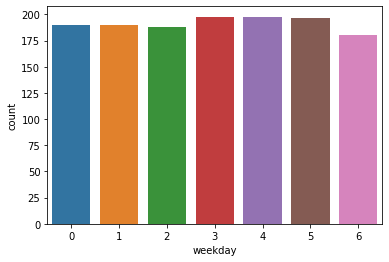

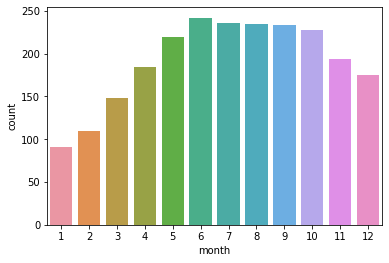

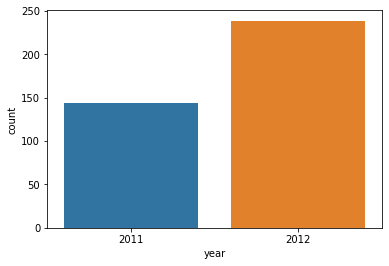

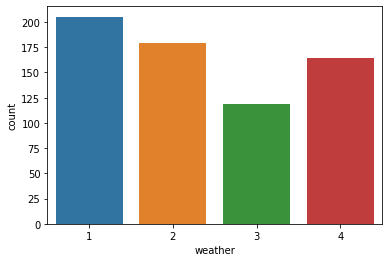

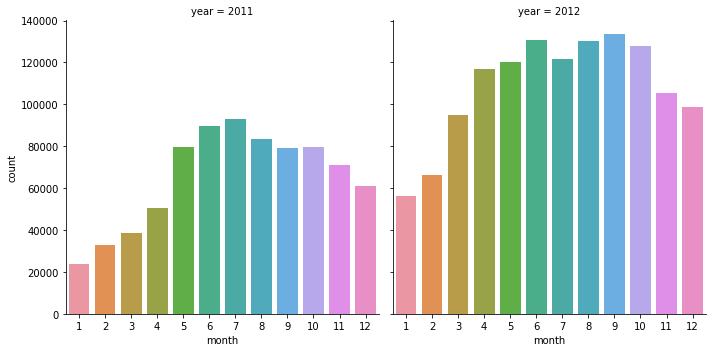

In [27]:
# Function created to plot summary of continuous variables on y axis and categorical variables on x axis
# Run below snippet to allow multiple outputs in one cell of python notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def bar_plots(input_data,x,y,method = 'sum'):
    if method == 'mean':
        summary = input_data.groupby(by = x).mean()
    else:
        summary = input_data.groupby(by = x).sum()
        
    # to obtain holiday as column in dataset instead of index, we need to reset index
    
    summary=summary.reset_index()
    sns.barplot(x=x,y=y, data=summary)
    plt.show()
    
bar_plots(train_data,'weekday', 'count', method = 'mean')
bar_plots(train_data,'month', 'count', method = 'mean')
bar_plots(train_data,'year', 'count', method = 'mean')
bar_plots(train_data,'weather', 'count', method = 'mean')

grouped_plot=train_data.groupby(by=['year','month']).sum().reset_index()
sns.catplot(x='month',y='count', data=grouped_plot, col='year', kind='bar')

plt.show()



From the above analysis we can see that month 5 to 10 have higher renting compared to other months. Also, distribution is somewhat similar for year 2011 & 2012 with higher bike rentals in 2012.
There's not much difference in bike rentals across different weekdays